# Using NumPy and Matplotlib to swap the phase of two images
Tristan Henser-Brownhill

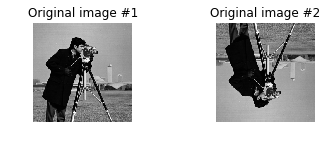

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt

#set plots inline for jupyter notebooks if needed
%matplotlib inline

#read single channel images
img_1 = plt.imread("cameraman.tif")
img_2 = plt.imread("cameraman_flip.tif")

#check the images
plt.figure(1)
plt.subplot(221)
plt.axis('off')
plt.title('Original image #1')
plt.imshow(img_1, cmap='gray')

plt.subplot(222)
plt.axis('off')
plt.title('Original image #2')
plt.imshow(img_2, cmap='gray')

plt.show()

In [2]:
#apply 2D Fourier transform
ft_1 = np.fft.fft2(img_1)
ft_2 = np.fft.fft2(img_2)

#swap image phases and recalculate frequency responses
out_1 = np.abs(ft_1) * np.exp(np.dot(1j,np.angle(ft_2)));
out_2 = np.abs(ft_2) * np.exp(np.dot(1j,np.angle(ft_1)));

#perform inverse 2D Fourier transform and take the real part
out_1 = np.real(np.fft.ifft2(out_1))
out_2 = np.real(np.fft.ifft2(out_2))

Equation for frequency recomputation:
\begin{equation*}
\Large H(f) = \lvert H(f) \rvert exp(j \angle (H(f)))
\end{equation*}

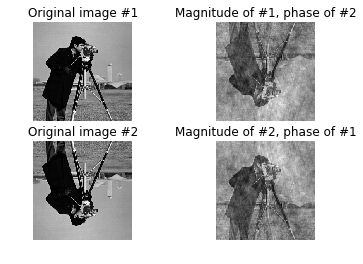

In [3]:
#create a figure and plot the comparative images
plt.figure(2)

plt.subplot(221)
plt.axis('off')
plt.title('Original image #1')
plt.imshow(img_1, cmap='gray')

plt.subplot(222)
plt.axis('off')
plt.title('Magnitude of #1, phase of #2')
plt.imshow(out_1, cmap='gray')

plt.subplot(223)
plt.axis('off')
plt.title('Original image #2')
plt.imshow(img_2, cmap='gray')

plt.subplot(224)
plt.axis('off')
plt.title('Magnitude of #2, phase of #1')
plt.imshow(out_2, cmap='gray')

plt.show()